In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#### Q1 - Why encoding parater, what was in file that make it use

In [2]:
os.getcwd()
company = pd.read_csv('companies[1].txt', 
                      sep="\t", encoding= 'unicode_escape')

In [3]:
mapping = pd.read_csv('mapping[1].csv')

In [4]:
# Note encoding parameter
round2 = pd.read_csv('rounds2[1].csv', 
                     encoding= 'unicode_escape')

In [5]:
company.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [7]:
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### Lets explore 1st table - company

In [8]:
# lets see how many different companies are there
company['name'].unique().shape[0]

66103

In [9]:
# Lets see which top 20 countries has maximum companies
country_wise_company = company.groupby(['country_code'])['name'].count()
cwc = country_wise_company.sort_values(ascending = False).head(20)

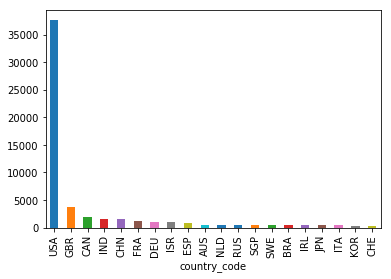

In [10]:
%matplotlib inline
cwc.plot(kind = 'bar')

In [11]:
# Lets see the different status of companies
company_status = company['status'].value_counts()

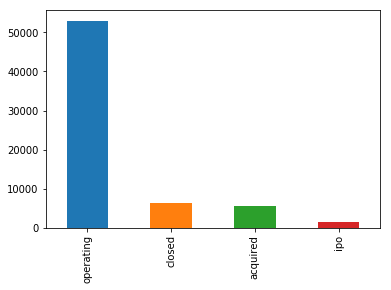

In [12]:
company_status.plot(kind='bar')

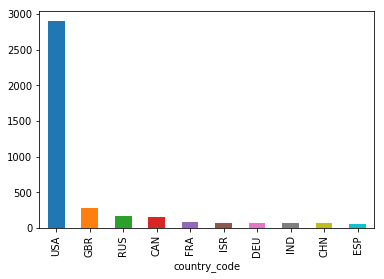

In [13]:
# I want to see the company count those are closed in countries with company status
comp_closed = company[company['status']=='closed'].groupby(['country_code'])['name'].count()
comp_closed = comp_closed.sort_values(ascending = False).head(10)

comp_closed.plot(kind='bar')

In [14]:
# contory wise companies those are in different status
comp_operating = company[company['status']=='operating'].groupby(['country_code'])['name'].count()
comp_operating = comp_operating.sort_values(ascending = False).head(10)

comp_acquired = company[company['status']=='acquired'].groupby(['country_code'])['name'].count()
comp_acquired = comp_acquired.sort_values(ascending = False).head(10)

comp_ipo = company[company['status']=='ipo'].groupby(['country_code'])['name'].count()
comp_ipo = comp_ipo.sort_values(ascending = False).head(10)

# fig, ax = plt.subplots(1,3)
# fig= plt.figure(figsize=(2,2))
# ax[0].plot(comp_operating)
# ax[1].plot()
# ax[2].plot()


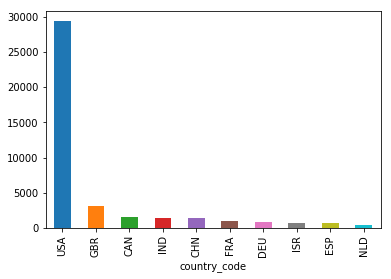

In [15]:
comp_operating.plot(kind='bar')

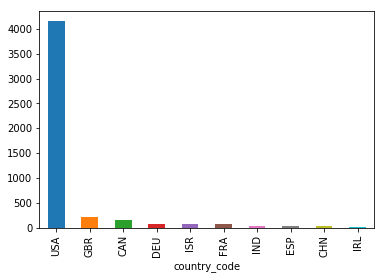

In [16]:
comp_acquired.plot(kind='bar')

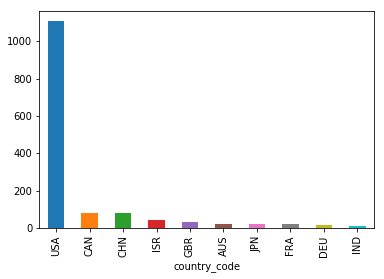

In [17]:
comp_ipo.plot(kind='bar')

#### Q2 -  How to plot bar plots for all three from plt.subplots()

In [19]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


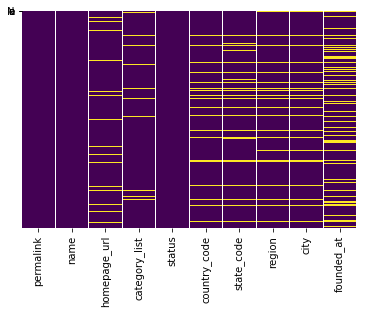

In [20]:
# check null values
import seaborn as sns
sns.heatmap(company.isna(), cmap = 'viridis', yticklabels='None', cbar = False)

In [21]:
company.isna().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [22]:
company.head(1)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN


In [23]:
# explore category_list column
company['category_list'].unique().shape[0]

27297

In [24]:
# top 20 categories (row count wise)
cat_counts = company['category_list'].value_counts().sort_values(ascending = False).head(20)
cat_counts

Software               3995
Biotechnology          3615
E-Commerce             1332
Mobile                 1177
Clean Technology       1133
Curated Web            1050
Hardware + Software     932
Health Care             930
Games                   862
Enterprise Software     845
Manufacturing           773
Health and Wellness     770
Advertising             700
Education               585
Semiconductors          501
Finance                 447
Real Estate             425
Consulting              423
Security                410
Social Media            407
Name: category_list, dtype: int64

In [79]:
# lets see if same company listed many times and category is not mentioned
names = company[company['category_list'].isna()]['name']
comp_cat_list = pd.DataFrame(columns=['name','category_list'])
for name in names:
     comp_cat_list = comp_cat_list.append(company[(company['name'] == name) & company['category_list'].notna()][['name','category_list']], ignore_index=False)
comp_cat_list.shape

(50, 2)

In [82]:
comp_cat_list.groupby(['name'])['category_list'].count()

name
Adtena                             1
Aptible                            1
Archive                            1
BTG                                1
Bactest                            1
Compass                            2
Dispatch                           2
Greenease                          1
Jolie                              1
Leaf                               1
Marquee                            2
Meta Search                        1
Moonlighting                       1
MuseFind                           1
Northwestern University            1
OFIXU                              1
OR Productivity                    1
Operator                           1
Pangea                             1
Pulsar                             1
Pulse                              1
Qingguo                            1
Remark                             1
Roadmap                            2
Robin                              2
SHIFT                              1
Sesh                             

In [42]:
names = company[company['country_code'].isna()]['name']
comp_country_list = pd.DataFrame(columns=['name','cont_list'])
for name in names:
     comp_country_list.append(company[(company['name'] == name) & company['country_code'].notna()][['name','country_code']], ignore_index=False)
comp_country_list

,name,cat_list


In [70]:
names = company[company['state_code'].isna()]['country_code']
names = names.dropna()
comp_state_list = pd.DataFrame(columns=['country_code','state_code'])
for name in names:
   # print(name)
   # print(company[(company['country_code'] == name)][['country_code','state_code']])
   comp_state_list = comp_state_list.append(company[(company['country_code'] == name) & company['state_code'].notna()][['country_code','state_code']], ignore_index=True)
comp_state_list.shape

,country_code,state_code
0,CHN,22
1,CHN,22
2,CHN,23
3,CHN,22
4,CHN,23
5,CHN,2
6,CHN,30
7,CHN,22
8,CHN,4
9,CHN,22


In [94]:
# Lets get rid of missing values
company_data = company.dropna(subset = ['name','category_list','country_code','state_code','city'])

In [95]:
# does region and city has same values

company[company['region'] == company['city']].count()

permalink        25370
name             25370
homepage_url     24090
category_list    24640
status           25370
country_code     25370
state_code       24649
region           25370
city             25370
founded_at       20347
dtype: int64

In [96]:
# removing few coluns from company -  permalink, homepage_url, region, founded_at
company_data = company_data.drop(axis=1, columns=['homepage_url', 'region', 'founded_at'])
company_data.shape

(55981, 7)

In [97]:
company_data.isna().sum()

permalink        0
name             0
category_list    0
status           0
country_code     0
state_code       0
city             0
dtype: int64

In [98]:
company_data.isnull().sum()

permalink        0
name             0
category_list    0
status           0
country_code     0
state_code       0
city             0
dtype: int64

In [99]:
# Lets explore the second table and merge it with first one - mapping table
mapping.head(2)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0


In [93]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [102]:
mapping.shape

(688, 10)

In [100]:
mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [101]:
(mapping['Blanks'] == 1).sum()

1

In [104]:
mapping_data = mapping.dropna()
mapping_data = mapping_data.drop(axis=1, columns=['Blanks'])
mapping_data.shape

(687, 9)

In [105]:
mapping_data.columns

Index(['category_list', 'Automotive & Sports', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [107]:
# check if there is no duplicatge sub category listed
mapping_data['category_list'].unique().shape[0]

687

In [147]:
# check if one sub category is not assigned to more than 1 category (one to many - not accepted)
print("column wise sum :")
print(mapping_data.sum(axis=1, numeric_only=True, skipna = True).max())

# check if multiple sub categories assigned to one category ( many to one - accepted) 
print("row wise sum : ")
t = mapping_data.sum(axis=0, numeric_only=True, skipna = True)
print(t)

column wise sum :
1
row wise sum : 
Automotive & Sports                         22
Cleantech / Semiconductors                  53
Entertainment                               89
Health                                      63
Manufacturing                               40
News, Search and Messaging                  72
Others                                     195
Social, Finance, Analytics, Advertising    153
dtype: int64


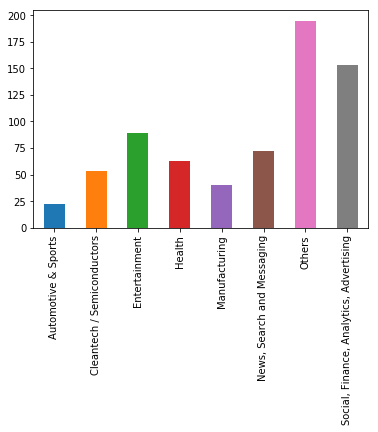

In [148]:
t.plot(kind = 'bar')

In [137]:
# before joining tables , lets see if both tables has same category_list
company_cat = set(company['category_list'])
mapping_cat = set(mapping['category_list'])
c_i_m = company_cat.intersection(mapping_cat)


print("company cat : ",len(company_cat),"\n mapping cat : ",len(mapping_cat), "\n common cat : ",len(c_i_m), 
      "\n company-common cat : ", len(company_cat)-len(c_i_m), "\n mapping-common cat : ", len(mapping_cat)-len(c_i_m))

company cat :  27297 
 mapping cat :  688 
 common cat :  463 
 company-common cat :  26834 
 mapping-common cat :  225


In [151]:
# Lets join two tables
company_mapping = company_data.merge(mapping_data, left_on='category_list', right_on='category_list', how='left')
print(company_data.shape, mapping_data.shape, company_mapping.shape)

(55981, 7) (687, 9) (55981, 15)


In [152]:
company_mapping

,permalink,name,category_list,status,country_code,state_code,city,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/Organization/-Fame,#fame,Media,operating,IND,16,Mumbai,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,/Organization/-Qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,Delaware City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/Organization/0-6-Com,0-6.com,Curated Web,operating,CHN,22,Beijing,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,/Organization/004-Technologies,004 Technologies,Software,operating,USA,IL,Champaign,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/Organization/0Xdata,H2O.ai,Analytics,operating,USA,CA,Mountain View,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,/Organization/1,One Inc.,Mobile,operating,USA,CA,San Francisco,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,/Organization/1-2-3-Listo,"1,2,3 Listo",E-Commerce,operating,CHL,12,Las Condes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,/Organization/1-4-All,1-4 All,Entertainment|Games|Software,operating,USA,NC,Connellys Springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,/Organization/1-618-Technology,1.618 Technology,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
company_mapping.isna().sum()

permalink                                  0
name                                       0
category_list                              0
status                                     0
country_code                               0
state_code                                 0
city                                       0
Automotive & Sports                        0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [145]:
# Lets check third table - round2
round2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [146]:
round2.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64